# Import packages

In [199]:
# Import packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Input data

[*********************100%%**********************]  1 of 1 completed


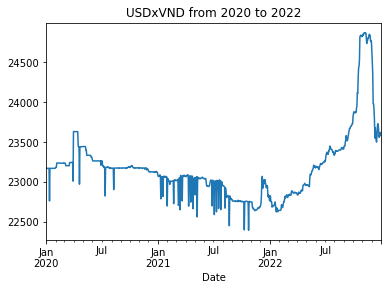

In [165]:
# Get data
data = yf.download('USDVND=X','2020-01-01','2022-12-31') # from 1 Jan 2021 to 31 December 2022

# Plot
data['Adj Close'].plot()
plt.title("USDxVND from 2020 to 2022")
plt.show()

# Exponential smoothing

#### Double Exponential smoothing i.e. Holt's Linear Smoothing
Use when there is trend in data, and no seasonality

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

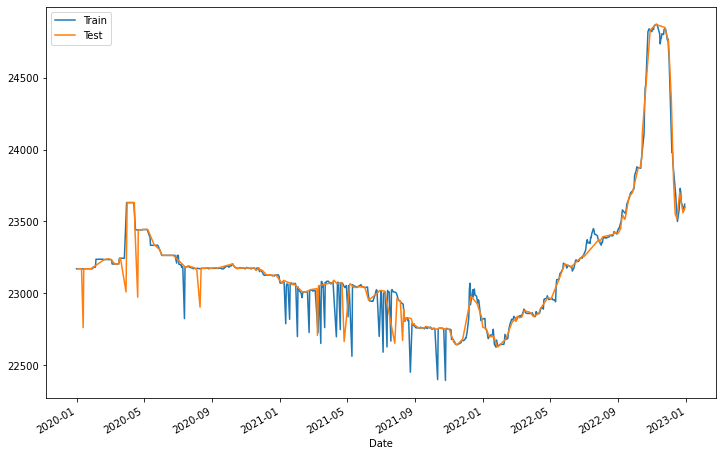

In [216]:
# Formatting and splitting dataset into train data and test data
df = pd.DataFrame(data, columns=['Adj Close'])
df.index = df.index.strftime('%m-%d-%Y, %r')
train_df, test_df = train_test_split(df)

# Perform smoothing
model = sm.tsa.ExponentialSmoothing(df['Adj Close'], trend='add')
des_model = model.fit(smoothing_level = 0.3, smoothing_trend = 0.2)
df['Forecast'] = des_model.fittedvalues

fit1 = model.fit() # simple exp smoothing
pred1 = fit1.forecast(365)
fit2 = model.fit(smoothing_level = 0.2) # double exp smoothing
pred2 = fit2.forecast(365)

# Plot
df = pd.DataFrame(data, columns=['Adj Close'])
train_df, test_df = train_test_split(df)
train_df['Adj Close'].plot(legend=True, label='Train')
test_df['Adj Close'].plot(legend=True, label='Test', figsize = (12,8))

In [217]:
train_df

,Adj Close
Date,
2020-05-15,23334.0
2022-10-27,24830.0
2020-04-30,23444.0
2021-10-12,22750.0
2022-09-19,23650.0
...,...
2021-12-30,22820.0
2021-12-28,22810.0
2022-11-29,24770.0
